# Credit Card Fraud Detection
by Stuart Miller

[Github Profile](https://github.com/sjmiller8182)

## Introduction

This dataset is from Machine Learning Gorup - ULB and is hosted by Kaggle [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

This dataset was generated from real transactions from European card holders. Due to confidentiality the original data set was not provided. The set contains columns labeled time, class, amount and V1 - V28. The columns V1 - V28 are the priciple components of the original data set. Class is 0 for normal transactions and 1 for fraudulant transactions. Time is the time between the first transaction and the current transaction in seconds. Amount is the transaction amount.

## Data Exploration

First a look at the data structure and the data characteristics.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in data and print head to verify data loaded correctly.

In [17]:
# read in data
data = pd.read_csv('../../data/creditcardfraud/creditcard.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### Make type coversions

**Class** is the variable for distingushing transactions as fraud or normal. This should be a category variable. It will also be converted to fraud/normal rather than 1/0 for indicators.

**Time** time is measured in seconds as the time the transaction occured with reference to the first transaction in the table. Time will be converted to the time between each transaction and the type converted to time delta (Pandas type).

In [18]:
data['Class'] = data.Class.replace({0:'Normal',1:'Fraud'}).astype('category')

new_col = data.Time[1:].reset_index(drop = True) - data.Time[0:-1]
new_col = np.hstack(([0], new_col.values))
data['Time'] = pd.to_timedelta(new_col, unit='s')

In [32]:
data.head()

Time        V1        V2        V3        V4        V5        V6  \
0 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 00:00:00 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 00:00:01 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount   Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62  Normal  
1  0.167170  0.125895 -0.008983  0.014724    2.69  Normal  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66  Normal  
3  0.647376 -0.221929  0.062723  0.061458  123.50  Normal  
4 -0.206010  0.502292  0.219422  0.215153   69.99  Normal  

[5 rows x 31 columns]

### Get basic info on data
* types
* data set size
* statistical summary
* balance of the classes

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null timedelta64[ns]
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float

All features have 284807 observations.

In [20]:
data.describe()

Time            V1            V2            V3  \
count                  284807  2.848070e+05  2.848070e+05  2.848070e+05   
mean   0 days 00:00:00.606698  1.165980e-15  3.416908e-16 -1.373150e-15   
std    0 days 00:00:01.053379  1.958696e+00  1.651309e+00  1.516255e+00   
min           0 days 00:00:00 -5.640751e+01 -7.271573e+01 -4.832559e+01   
25%           0 days 00:00:00 -9.203734e-01 -5.985499e-01 -8.903648e-01   
50%           0 days 00:00:00  1.810880e-02  6.548556e-02  1.798463e-01   
75%           0 days 00:00:01  1.315642e+00  8.037239e-01  1.027196e+00   
max           0 days 00:00:32  2.454930e+00  2.205773e+01  9.382558e+00   

                 V4            V5            V6            V7            V8  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.086869e-15  9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16   
std    1.415869e+00  1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00   
min   -5.683171e+00 -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01   
25%   -8.486401e-01 -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01   
50%   -1.984653e-02 -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02   
75%    7.433413e-01  6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01   
max    1.687534e+01  3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01   

                 V9  ...           V20           V21           V22  \
count  2.848070e+05  ...  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -2.406455e-15  ...  6.406703e-16  1.656562e-16 -3.444850e-16   
std    1.098632e+00  ...  7.709250e-01  7.345240e-01  7.257016e-01   
min   -1.343407e+01  ... -5.449772e+01 -3.483038e+01 -1.093314e+01   
25%   -6.430976e-01  ... -2.117214e-01 -2.283949e-01 -5.423504e-01   
50%   -5.142873e-02  ... -6.248109e-02 -2.945017e-02  6.781943e-03   
75%    5.971390e-01  ...  1.330408e-01  1.863772e-01  5.285536e-01   
max    1.559499e+01  ...  3.942090e+01  2.720284e+01  1.050309e+01   

                V23           V24           V25           V26           V27  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.578648e-16  4.471968e-15  5.340915e-16  1.687098e-15 -3.666453e-16   
std    6.244603e-01  6.056471e-01  5.212781e-01  4.822270e-01  4.036325e-01   
min   -4.480774e+01 -2.836627e+00 -1.029540e+01 -2.604551e+00 -2.256568e+01   
25%   -1.618463e-01 -3.545861e-01 -3.171451e-01 -3.269839e-01 -7.083953e-02   
50%   -1.119293e-02  4.097606e-02  1.659350e-02 -5.213911e-02  1.342146e-03   
75%    1.476421e-01  4.395266e-01  3.507156e-01  2.409522e-01  9.104512e-02   
max    2.252841e+01  4.584549e+00  7.519589e+00  3.517346e+00  3.161220e+01   

                V28         Amount  
count  2.848070e+05  284807.000000  
mean  -1.220404e-16      88.349619  
std    3.300833e-01     250.120109  
min   -1.543008e+01       0.000000  
25%   -5.295979e-02       5.600000  
50%    1.124383e-02      22.000000  
75%    7.827995e-02      77.165000  
max    3.384781e+01   25691.160000  

[8 rows x 30 columns]

In [127]:
# since all columns are full count on any feature - V1

total_transactions = data.V1.count()
num_fraud_transactions = data[data['Class']=='Fraud'].V1.count()
num_real_transactions = data[data['Class']=='Normal'].V1.count()
print("The number of real transactions is {} and the number of fraud transactions is {}." \
      .format(num_real_transactions, num_fraud_transactions))
print("The real transactions account for {:0.4f}% of the total." \
      .format(num_real_transactions/total_transactions*100))
print("The fraud transactions account for {:0.4f}% of the total." \
      .format(num_fraud_transactions/total_transactions*100))

The number of real transactions is 284315 and the number of fraud transactions is 492.
The real transactions account for 99.8273% of the total.
The fraud transactions account for 0.1727% of the total.


The data is **highly unbalanced** with real (legitimate) transactions accounting for more than 99% of the total transactions in the data set.

### Data Exploration
####  Are there correlations between the features of the dataset?

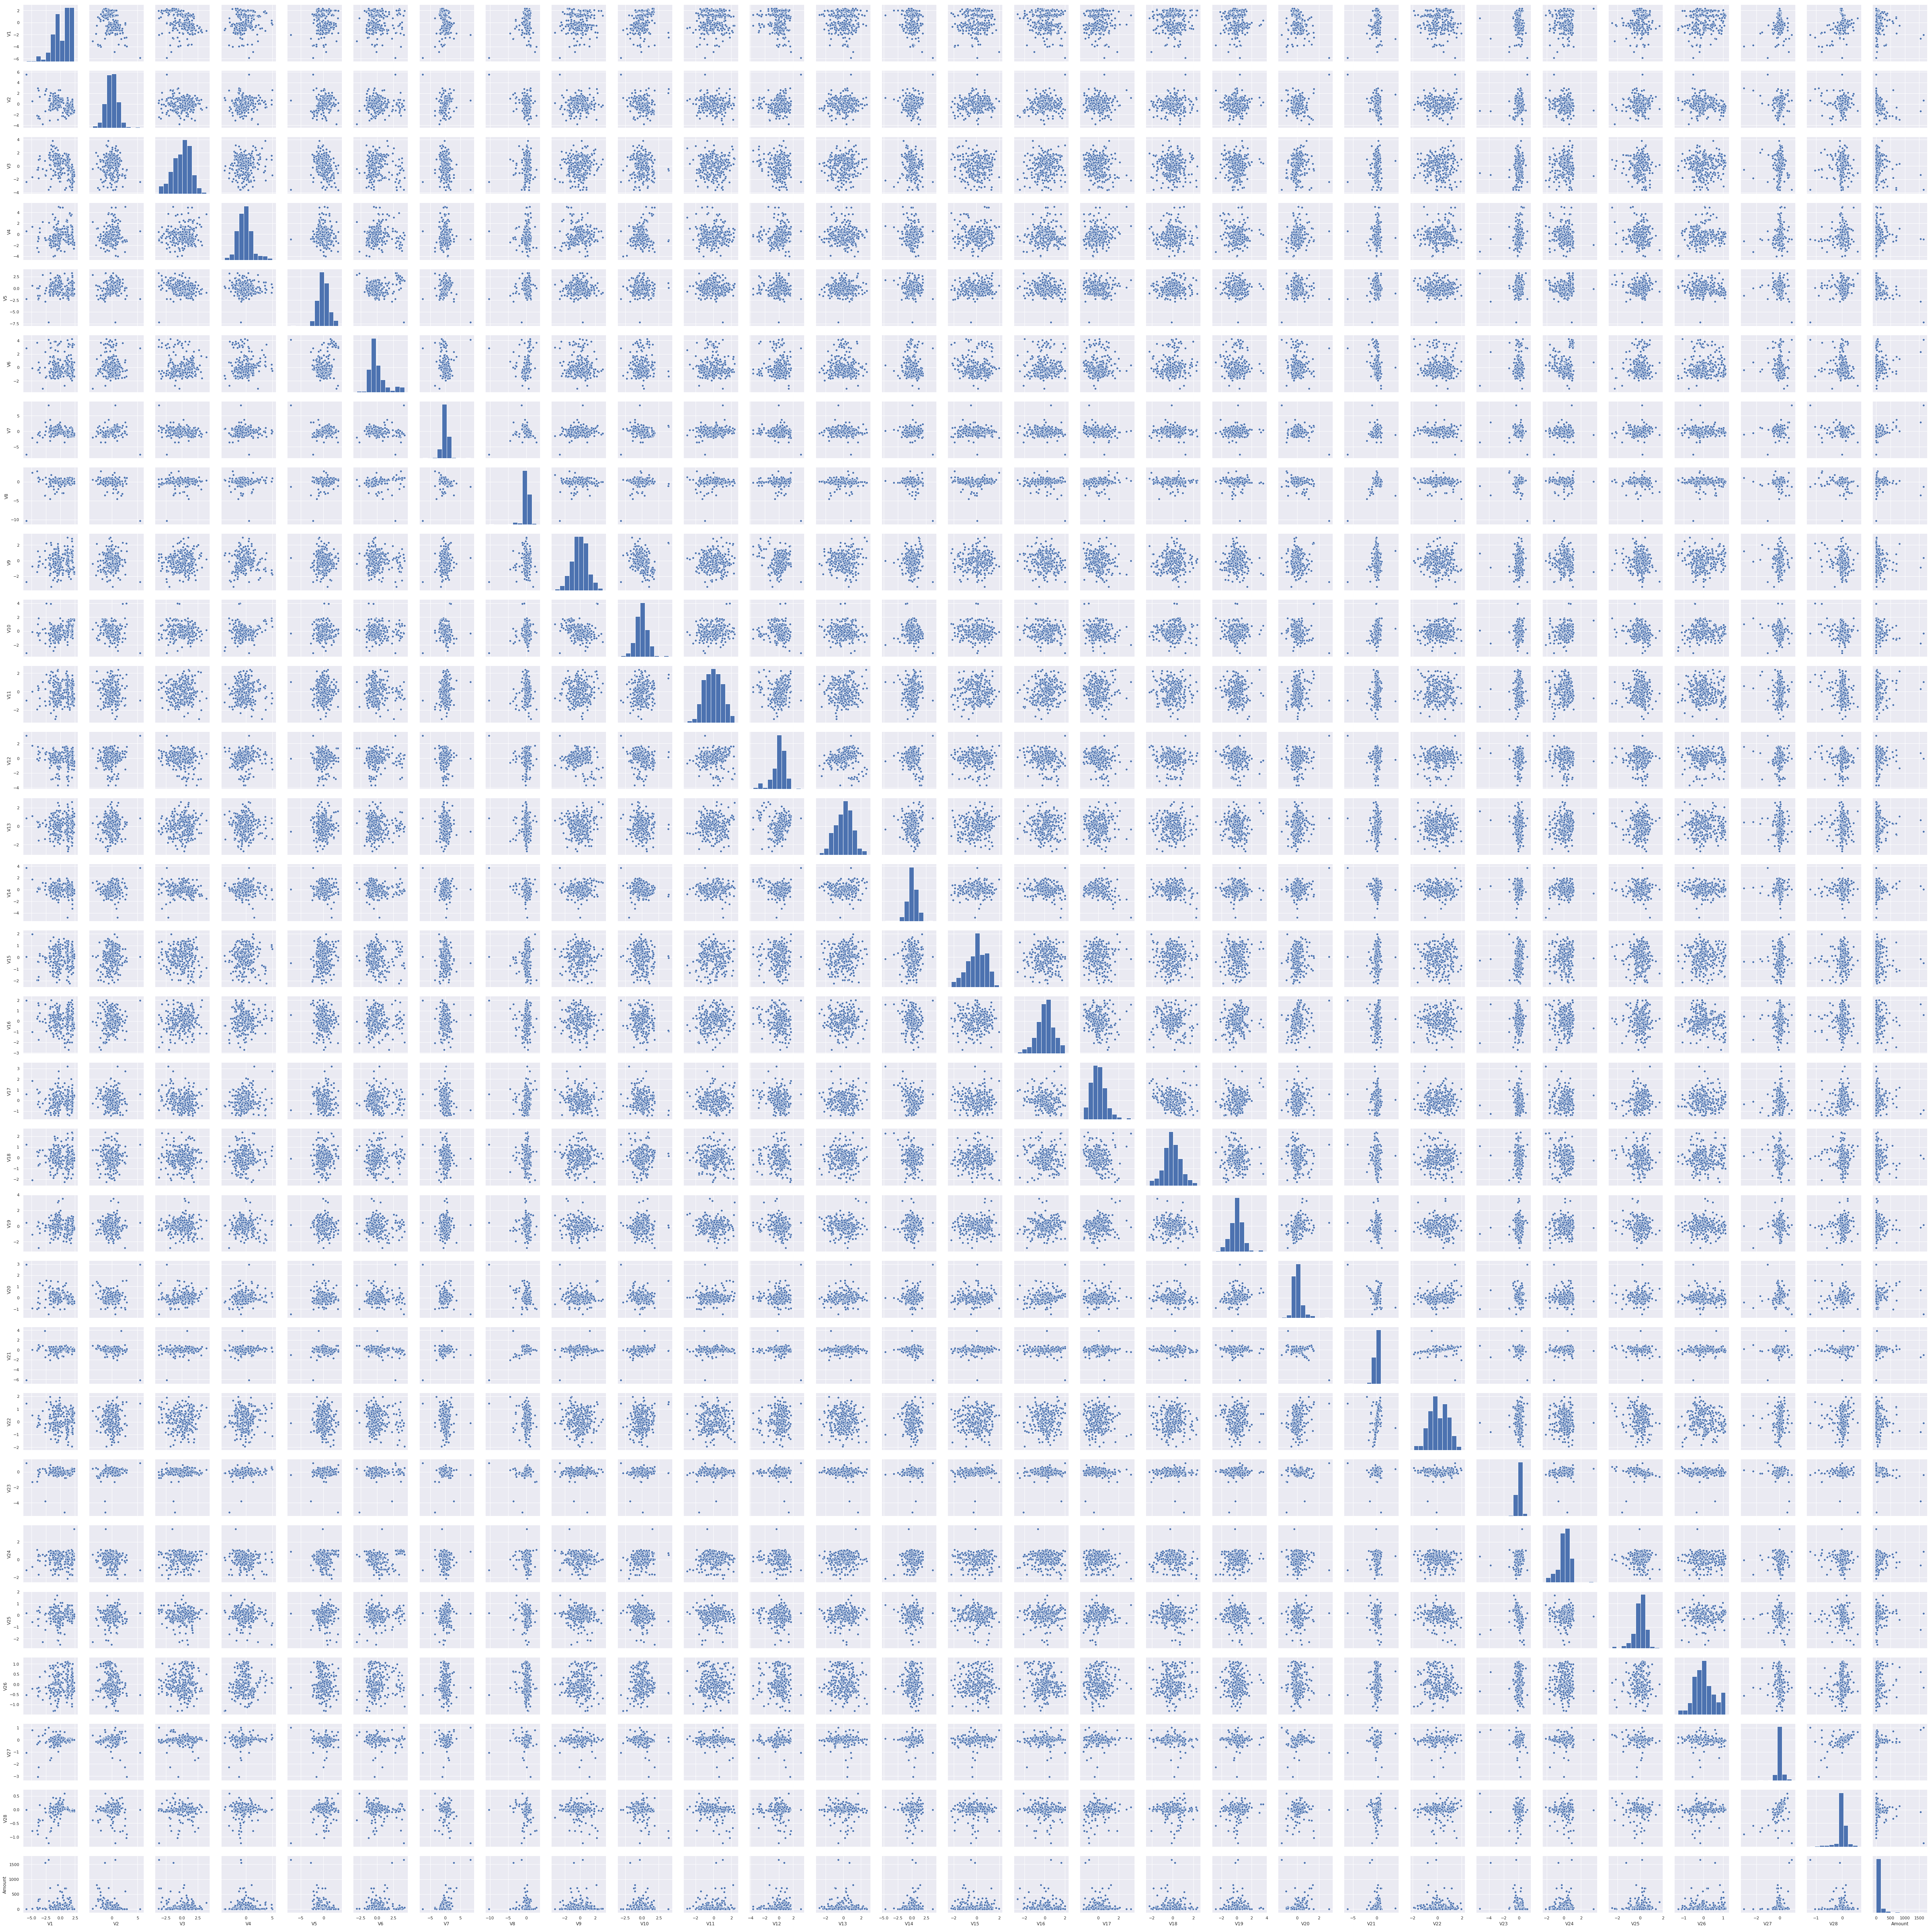

In [25]:
sns.set()
sns.pairplot(data.sample(frac=.001));
# downsample the data to get a reasonable run time

In [29]:
# calc the correlation coefficients between columns
coef = data.corr()
coef[coef > 0.5].count()

V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
dtype: int64

Because there are so many features, it is hard to tell from the pairplot, but it does not look like there are any correlated features. This is backed up by the pearson correlation calculation. There are **no correlations between columns** greater than 0.5. The count '1' that is listed is from the column correlated on itself. *This is not surprising since the description notes that the columns V1-V28 are **principle components**.*

#### Distribution of time and amounts

In [131]:
data.Time

0        00:00:00
1        00:00:00
2        00:00:01
3        00:00:00
4        00:00:01
5        00:00:00
6        00:00:02
7        00:00:03
8        00:00:00
9        00:00:02
10       00:00:01
11       00:00:00
12       00:00:00
13       00:00:01
14       00:00:01
15       00:00:00
16       00:00:00
17       00:00:01
18       00:00:01
19       00:00:01
20       00:00:01
21       00:00:01
22       00:00:01
23       00:00:00
24       00:00:04
25       00:00:00
26       00:00:01
27       00:00:00
28       00:00:00
29       00:00:00
           ...   
284777   00:00:02
284778   00:00:00
284779   00:00:02
284780   00:00:00
284781   00:00:00
284782   00:00:01
284783   00:00:01
284784   00:00:00
284785   00:00:00
284786   00:00:00
284787   00:00:01
284788   00:00:01
284789   00:00:00
284790   00:00:01
284791   00:00:03
284792   00:00:00
284793   00:00:01
284794   00:00:02
284795   00:00:01
284796   00:00:02
284797   00:00:02
284798   00:00:00
284799   00:00:01
284800   00:00:01
284801   0

#### Which features appear to be different between the two classes?

Plot all the 'V' columns split by 'Class' to get a sense of which columns more most dissimilar between 'Class'.

In [39]:
fraud_data = data[data['Class'] == 'Fraud']
normal_data = data[data['Class'] == 'Normal'].sample(frac = 0.005)

In [45]:
resam_data = pd.concat([fraud_data,normal_data])

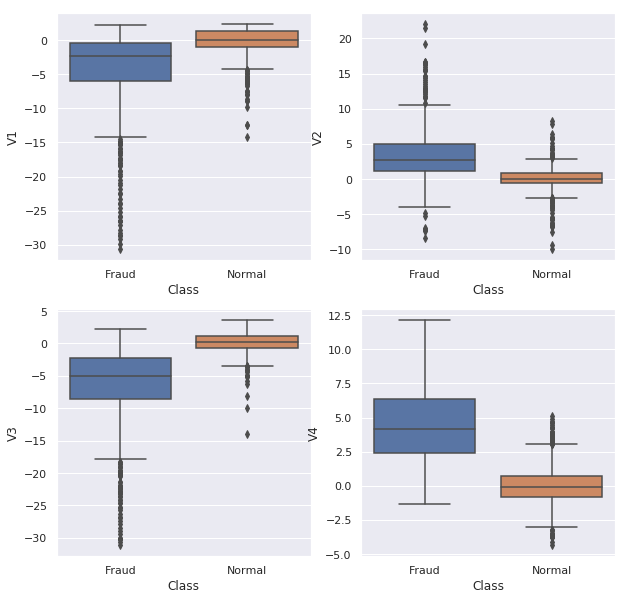

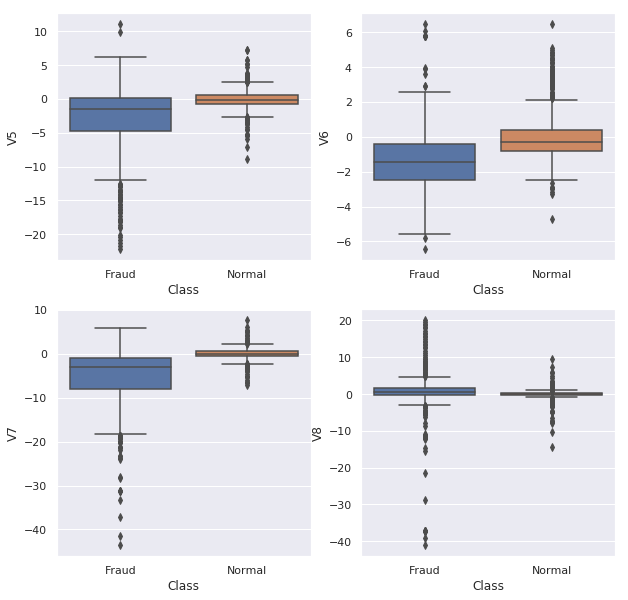

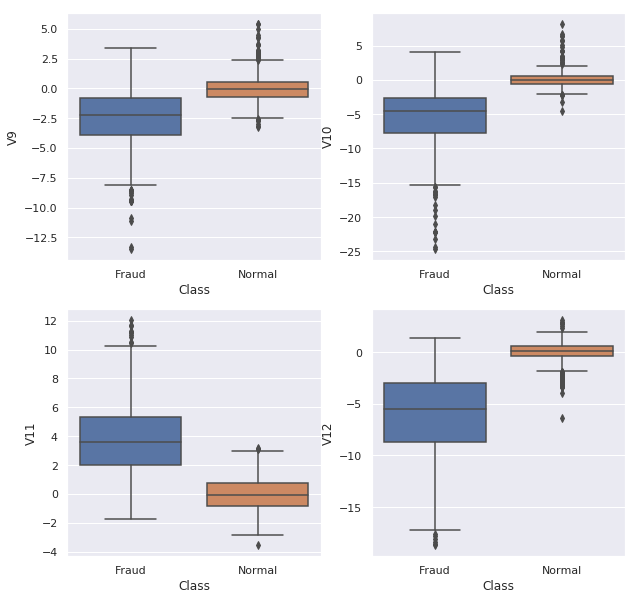

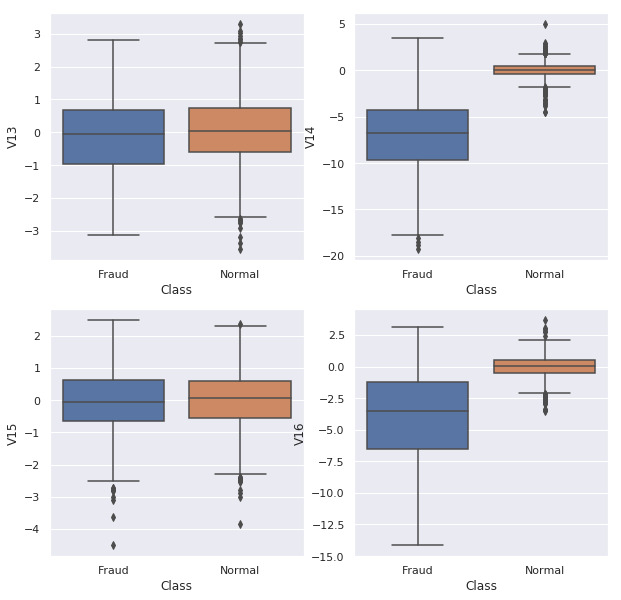

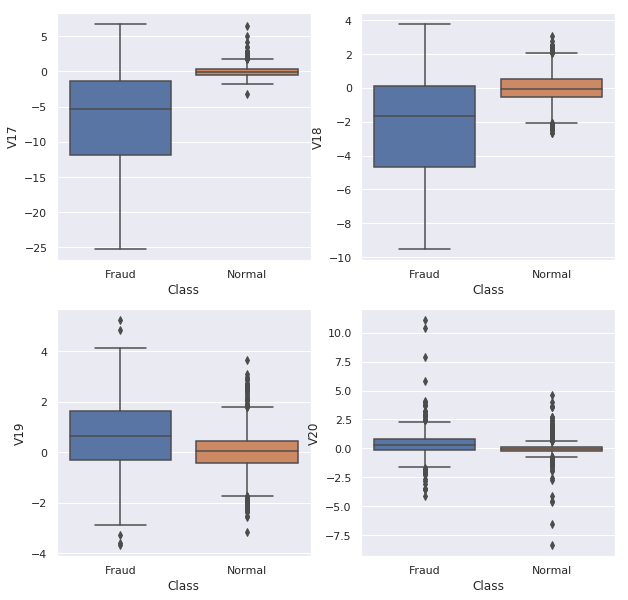

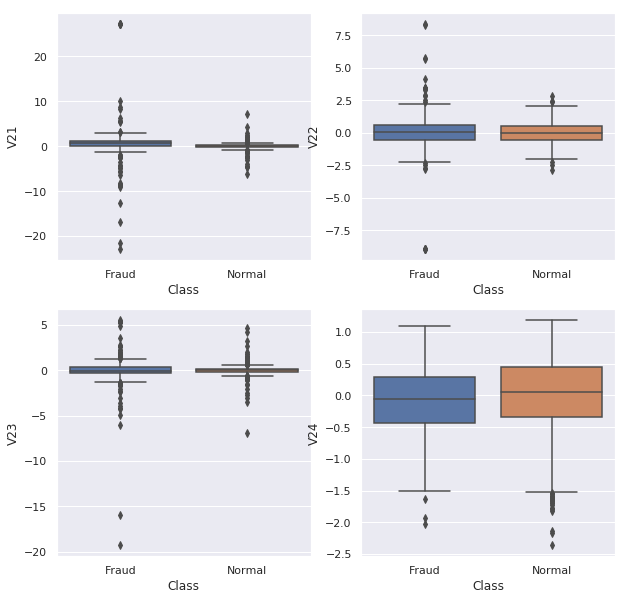

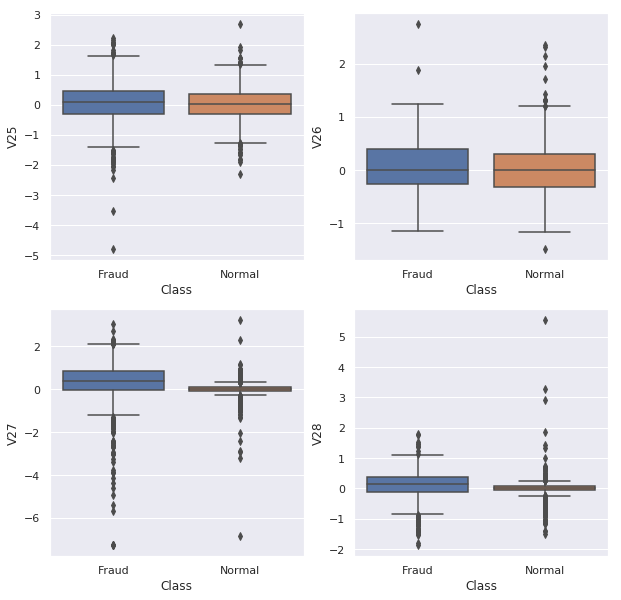

In [124]:
sns.set()
for i in range(0, 7):
    columns = resam_data.columns[1+i*4:i*4+5].values
    fig = plt.figure(figsize=(10, 10))
    for col, plot in zip(columns,range(1,len(columns)+1)):
        sub_plot = fig.add_subplot(2,2,plot)
        sns.catplot(x = 'Class', y = col, kind = 'box',
                    data = resam_data, ax = sub_plot);
        
for i in [2,3,4,5,7,8,9,10,12,13,14,15,17,18,19,20,22,
          23,24,25,27,28,29,30,32,33,34,35]:
    plt.close(i)

From the plots above, the following features of the dataset seem to be best bets on distinguishing the classes using the features:

1,2,3,4,5,7,9,10,11,12,14,16,17,18